<img src="Images/logo.jpg" width="600">

##  Exercitation_09 

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities. The salesman has to visit each one of the cities $\vec{x}_i$ olny one time, starting from his hometown and returning to the same city ($\vec{x}_{N+1}=\vec{x}_1$). The challenge of the problem is that the traveling salesman wants to minimize the total length of the trip.  
One can use different *loss functions* to parametrize the lenght of the path. In this exercitation I used the function
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2 \, .
$$
Once the algorithm is complete, we had to apply it in two cases:
- 32 cities randomly placed **on** a circumference
- 32 cities randomly placed **inside** a square

All the function and classes I implemented in this exercitation are in `genetic.cpp`.  
First of all I wrote a function *Circle* which generates cities randomly placed of a circumference. Then I added some *Print* functions with different input, useful in the following steps and a boundary conditions (*BC*) function to make the salesman return home at the end.

Then I implemented a class *Individual*, characterized by two vectors ($\vec{x}$, $\vec{y}$) of coordinates, i.e. the cromosomes. With $N=32$, the cromosomes have size 32 and contain the coordinates of the cities. This class has some functions: 
- functions of **mutation**, all of them use in input the probability of mutation (I report an exemple on an hypothetical situation with $N=5$). None of the following functions can never change the hometown: 

    - *Permutation*: exchanges the positions of two cities, randomly chosen (I used the function *vector::swap*).  
    
    $$\left[ 1, 2, 3, 4, 5 \right] \to \text{randomly extracts positions } 1 \text{ and } 4 \to \left[ 4, 2, 3, 1, 5 \right]$$  
       
    - *Shift*: randomly choose a starting city, the lenght of shift and the lenght of the "block", and then moves it of the lenght of the shift.(I used *vector::emplace* and *vector::erase*).  
        
    $$\left[ 1, 2, 3, 4, 5 \right] \to \text{randomly extracts } x_{start} = 2, N_{shift}=1, N_{block} = 3 \to \left[ 1, 5, 2, 3, 4 \right]$$  
    
    - Block_permutation: swaps a block of *bl* cities  with the following *bl*, from a starting city and a lenght of the block *bl* randomly chosen
    
    $$\left[ 1, 2, 3, 4, 5 \right] \to \text{randomly extracts } x_{start} = 2, bl = 2 \to \left[ 1, 4, 5, 2, 3 \right]$$ 
    - Inversion: from a starting point, mirror-inverts the positions of a block of cities of lenght *len* on the right and on the left. Both the sarting point and *len* are chosen randomly.
    
    $$\left[ 1, 2, 3, 4, 5 \right] \to \text{randomly extracts } x_{start} = 3, len = 2 \to \left[ 5, 4, 3, 2, 1 \right]$$ 
  
- *Check* function: I used it every time I implemented a function on an *Individual*. It checks that the class does not have repetitions in the cromosomes and that the first and the last city are the same (i.e. the salesman can return home at the end); 
- *Print* function, which print to an output file the cromosomes of the *Individual* class;
- *Create_Population*, a function which, starting from the first *Individual* creates a population (i.e. a vector of *Individual*) through some mutations.  
- *L2*, a function which returns the value of the loss function described above.

I added a *crossover* function as described in the text of the exercitation and some functions which take in input the population and print in output files the average lenght on the best half of the population, the shortest path lenght and the final configuration of the cities.

Finally, a function *New_Gen*, which creates the new generation in three steps:
   1. evalues the loss function of every *Individual* of the population and sort them with respect to it;
   2. extracts a position $i$ in the best half of the population with the **selection operator** described in the text of the exercitation $$ i=N\cdot r^2 \, , \quad \quad \quad \text{where }r \in [0;1] $$
   3. extracts two parents, perform *Crossover* and the *Mutations*, until a new population is created. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

In the following, I report the result obtained with my code.  

I show a plot of the trend of the loss function with respect to the generations, in particular the best and the average on the best half of the population. 
Then, I show the starting disposition of the cities on the left and the final path on the right. I indicate in the legend the hometown and the first city visited, so one can follow the travel of the salesman without the degeneration due to the direction.  

The parameters I used are: 
- Number of cities $N{city} = 32$;
- Number of individual in a population $N_{pop} = 1000$;
- Number of generations $N_{gen} = 500$;
- Number of mutations $N_{mut} = 14$;
- Probability of *crossover* $= 50 \%$;
- Probability of *mutation* $= 10 \%, \, \, $    ($2.5 \%$ for every of the four mutations described above);

The program performs the following steps:
   1. Creation of the initial configuration (printed in `circ.0` for the circle and `sq.0` for the square) and definition of the first class *Individual*;
   2. Generation of the first generation from the first *Individual*;
   3. Creation of the new generations with the function *New_Gen* and the different *mutations* described above;
   4. Print in `circle.shorter` and `sq.shortest` the lenght of the best path;
   5. Print in `circle.ave` and `sq.ave` the average lenght of the path, on the best half of the population; 
   6. Print the best path in `circle.fin` and `sq.fin`.

###  32 cities placed ON a circumference of $r=1$
    
    
In the first situation, with the cities placed **on** a circumference, I can expect that the salesman visits the cities in order, anticlock-wise. Following this expectation, the maximum lenght of the path I would accept is the lenght of the circumference ($C = 2 \cdot \pi $ with $r=1$), but even very smaller because we have only 32 cities, and it would converge to $2 \pi$ if $N_{city} \to \infty$.
    
Here I show the calculation of the shortest path, the trends of the loss function and the initial and final configurations.

In [3]:
def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2

# Compute the optimized path length
xc, yc = np.loadtxt("P1/Risultati/circ.fin", usecols=(0,1), unpack='true')
dim = np.size(xc)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xc[i], yc[i], xc[i+1], yc[i+1])

print('Optimized configuration path length = ', '%.3f' %sum)

Optimized configuration path length =  3.463


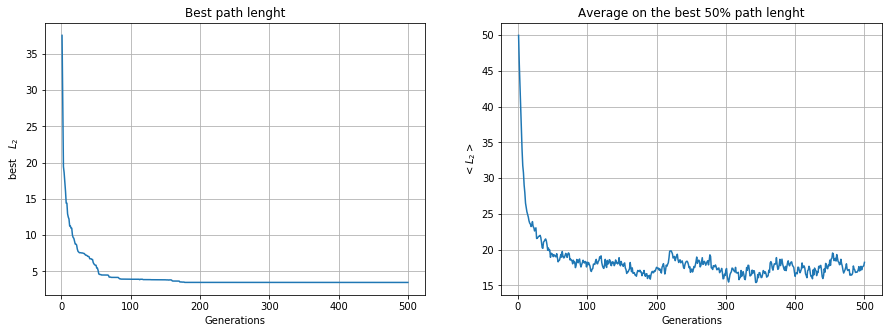

In [4]:
#Andamento L2
plt.figure(figsize=(15,5))

plt.subplot(121)
data_L= ascii.read('P1/Risultati/circ.shortest', format='no_header')
gen = data_L['col1']
L2 = data_L['col2']
plt.grid(True)
plt.plot(gen, L2)
plt.title('Best path lenght')
plt.xlabel('Generations')
plt.ylabel('$\mathrm{best } \quad L_2$')

plt.subplot(122)
data_L= ascii.read('P1/Risultati/circ.ave', format='no_header')
gen = data_L['col1']
L2 = data_L['col2']
eL2 = data_L['col3']
plt.grid(True)
#plt.errorbar(gen, L2, eL2)
plt.plot(gen, L2)
plt.title('Average on the best 50% path lenght')
plt.xlabel('Generations')
plt.ylabel('$<L_2>$')
plt.show()

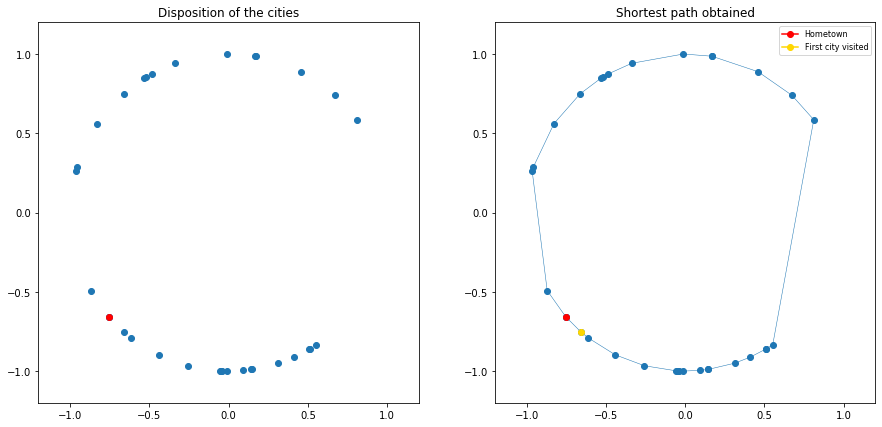

In [5]:
plt.figure(figsize=(15,7))

plt.subplot(121)
data= ascii.read('P1/Risultati/circ.0', format='no_header')
x_circ = data['col1']
y_circ = data['col2']
plt.title('Disposition of the cities')
plt.plot(x_circ,y_circ, marker='.', linestyle='', markersize = 12)
plt.plot(x_circ[0], y_circ[0], label='Hometown', color='r', marker='o')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.subplot(122)
data= ascii.read('P1/Risultati/circ.fin', format='no_header')
x_circ = data['col1']
y_circ = data['col2']
plt.title('Shortest path obtained')
plt.plot(x_circ,y_circ, marker='.', linestyle='-', lw=0.5, markersize = 12)
plt.plot(x_circ[0], y_circ[0], label='Hometown', color='r', marker='o')
plt.plot(x_circ[1], y_circ[1], label='First city visited', color='gold', marker='o')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend(loc='best', fontsize=8)
plt.show()

The results obtained are in well agreement with the considerations made at the beginning of this part.

###  32 cities placed IN a square of $\ell=2$
    
    
In this second application, there are not so many observations and expectations I can do, and this makes the algorithm essential and very interesting.  
After the results, I will only make some visual comments and qualitative observations.

In [6]:
def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2
# Compute the optimized path length
xs, ys = np.loadtxt("P1/Risultati/sq.fin", usecols=(0,1), unpack='true')
dim = np.size(xs)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xs[i], ys[i], xs[i+1], ys[i+1])

print('Optimized configuration path length = ', '%.3f' %sum)

Optimized configuration path length =  5.742


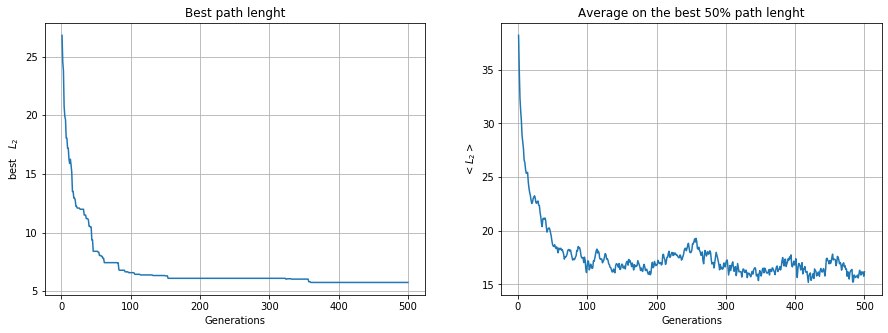

In [7]:
#Andamento L2
plt.figure(figsize=(15,5))

plt.subplot(121)
data_L= ascii.read('P1/Risultati/sq.shortest', format='no_header')
gen = data_L['col1']
L2 = data_L['col2']
plt.grid(True)
plt.plot(gen, L2)
plt.title('Best path lenght')
plt.xlabel('Generations')
plt.ylabel('$\mathrm{best } \quad L_2$')

plt.subplot(122)
data_L= ascii.read('P1/Risultati/sq.ave', format='no_header')
gen = data_L['col1']
L2 = data_L['col2']
eL2 = data_L['col3']
plt.grid(True)
#plt.errorbar(gen, L2, eL2)
plt.plot(gen, L2)
plt.title('Average on the best 50% path lenght')
plt.xlabel('Generations')
plt.ylabel('$<L_2>$')
plt.show()

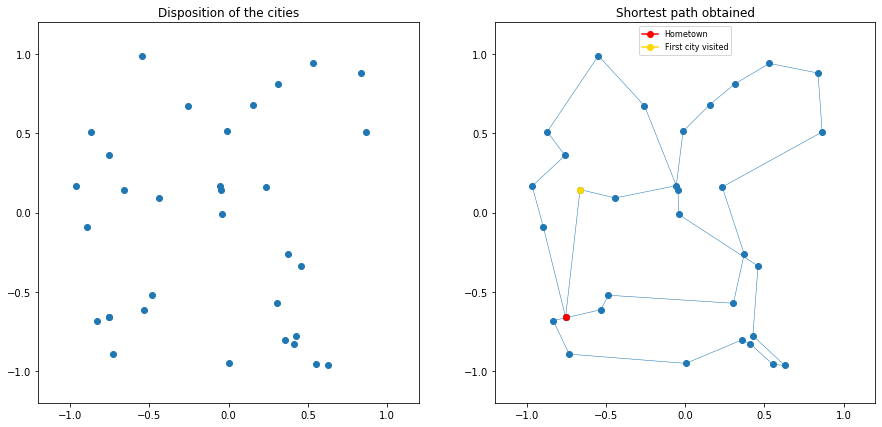

In [8]:
plt.figure(figsize=(15,7))

plt.subplot(121)
data= ascii.read('P1/Risultati/sq.0', format='no_header')
x_sq = data['col1']
y_sq = data['col2']
plt.title('Disposition of the cities')
plt.plot(x_sq,y_sq, marker='.', linestyle='', markersize = 12)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.subplot(122)
data= ascii.read('P1/Risultati/sq.fin', format='no_header')
x_sq = data['col1']
y_sq = data['col2']
plt.title('Shortest path obtained')
plt.plot(x_sq,y_sq, marker='.', linestyle='-', lw=0.5, markersize = 12)
plt.plot(x_sq[0], y_sq[0], label='Hometown', color='r', marker='o')
plt.plot(x_sq[1], y_sq[1], label='First city visited', color='gold', marker='o')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend(loc='upper center', fontsize=8)
plt.show()

I expected this part to be more difficult, and even if the algorithm well converges, I am not satisfied of the best path I qualitatively see.  
I decide to repeat the simulation, to show how the results change with the parameters. I performed with more generations, $N_{gen} = 1500$, but the results is very similar. Then I tried to increase the mutations to $N_{mut} = 20$, but the path becomes longer. 

In [9]:
def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2
# Compute the optimized path length
xs, ys = np.loadtxt("P1/Risultati/sq1500.fin", usecols=(0,1), unpack='true')
xs2, ys2 = np.loadtxt("P1/Risultati/sq20.fin", usecols=(0,1), unpack='true')
dim = np.size(xs)
sum = 0.
sum2 = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xs[i], ys[i], xs[i+1], ys[i+1])
    sum2 += L2(xs2[i], ys2[i], xs2[i+1], ys2[i+1])

print('Path length with 1500 generations and 14 mutations = ', '%.3f' %sum)
print('Path length with 1500 generations and 20 mutations = ', '%.3f' %sum2)

Path length with 1500 generations and 14 mutations =  5.723
Path length with 1500 generations and 20 mutations =  7.297


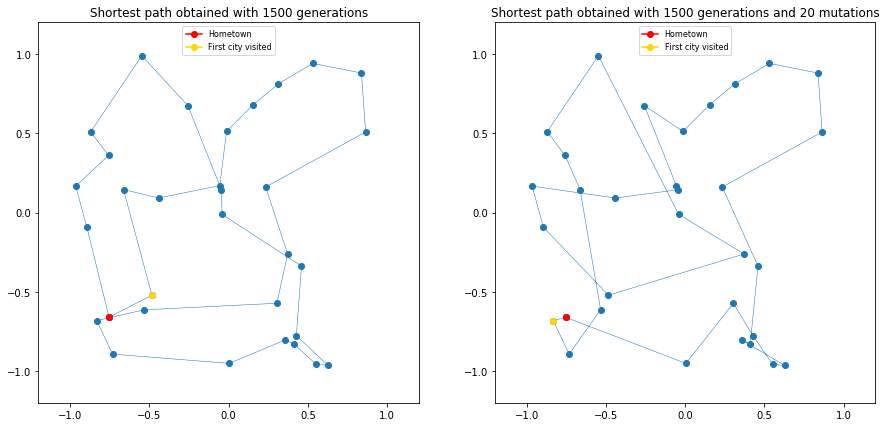

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(121)
data= ascii.read('P1/Risultati/sq1500.fin', format='no_header')
x_sq = data['col1']
y_sq = data['col2']
plt.title('Shortest path obtained with 1500 generations')
plt.plot(x_sq,y_sq, marker='.', linestyle='-', lw=0.5, markersize = 12)
plt.plot(x_sq[0], y_sq[0], label='Hometown', color='r', marker='o')
plt.plot(x_sq[1], y_sq[1], label='First city visited', color='gold', marker='o')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend(loc='upper center', fontsize=8)

plt.subplot(122)
data= ascii.read('P1/Risultati/sq20.fin', format='no_header')
x_sq = data['col1']
y_sq = data['col2']
plt.title('Shortest path obtained with 1500 generations and 20 mutations')
plt.plot(x_sq,y_sq, marker='.', linestyle='-', lw=0.5, markersize = 12)
plt.plot(x_sq[0], y_sq[0], label='Hometown', color='r', marker='o')
plt.plot(x_sq[1], y_sq[1], label='First city visited', color='gold', marker='o')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend(loc='upper center', fontsize=8)
plt.show()

Finally, I try to reduce the mutations to $N_{mut}=10$, do the population greater ($N_{pop} =2000$ *Individual*s) and $N_{gen}=1000$ generations, given that I see that with 1500 the results do not change a lot.

In [11]:
def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2
# Compute the optimized path length
xs, ys = np.loadtxt("P1/Risultati/sq102000.fin", usecols=(0,1), unpack='true')
dim = np.size(xs)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xs[i], ys[i], xs[i+1], ys[i+1])

print('Path length with 1000 generations of 2000 individual with 10 mutations = ', '%.3f' %sum)

Path length with 1000 generations of 2000 individual with 10 mutations =  3.766


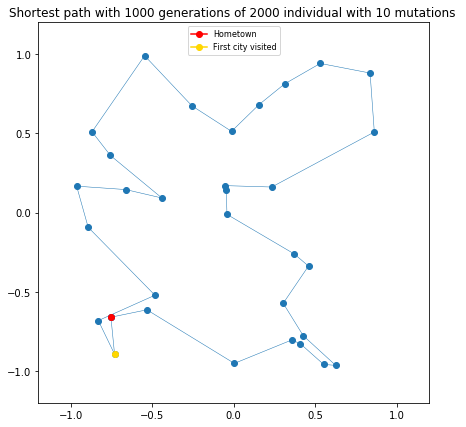

In [12]:
plt.figure(figsize=(7,7))

data= ascii.read('P1/Risultati/sq102000.fin', format='no_header')
x_sq = data['col1']
y_sq = data['col2']
plt.title('Shortest path with 1000 generations of 2000 individual with 10 mutations ')
plt.plot(x_sq,y_sq, marker='.', linestyle='-', lw=0.5, markersize = 12)
plt.plot(x_sq[0], y_sq[0], label='Hometown', color='r', marker='o')
plt.plot(x_sq[1], y_sq[1], label='First city visited', color='gold', marker='o')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend(loc='upper center', fontsize=8)
plt.show()

This last result has a shorter path and visually seems very good.